In [1]:
#!pip install yfinance

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
tickerSymbol = 'WMT'
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start = '2010-01-01', end = '2023-11-10')
tickerDf = tickerDf[['Close']]
tickerDf.head()

,Close
Date,
2010-01-04 00:00:00-05:00,39.871326
2010-01-05 00:00:00-05:00,39.474300
2010-01-06 00:00:00-05:00,39.386074
2010-01-07 00:00:00-05:00,39.408123
2010-01-08 00:00:00-05:00,39.209618


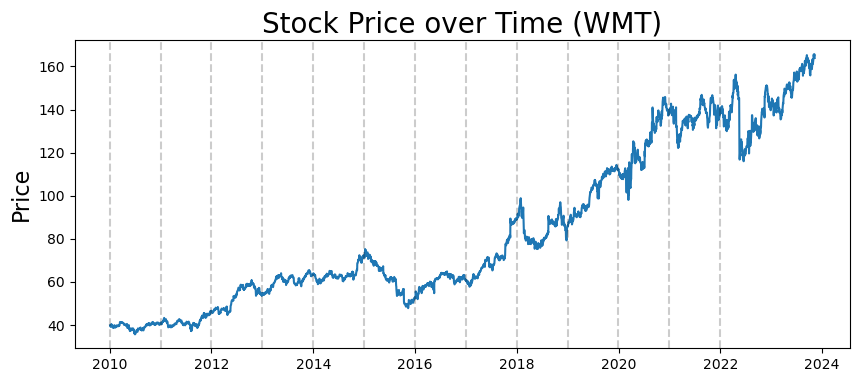

In [3]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range (2010,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color ='k', linestyle = '--', alpha = 0.2)

One of the things we see here straightaway that the price data over this time period is not stationary, there is definitely an upwards trend over time as the economy got better from 2016 to 2022. But we are looking for stationarity which would be that it's centred around some number, the volatility is not changing over time and there's no seasonal component. So may be the first thing we need to do is to take the first difference. Hence, instead of plotting this series, we plot the series which is stock price today minus stock price on the previous day. Because that's more likely to be stationary as the difference is basically the price return of the stock on any given day and that by the nature of how stock market operates, should grow/decline steadily rather than drastically.

## Stationarity: Taking first difference of this series

In [4]:
#taking first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

#setting first difference as variable in dataframe
tickerDf['first_difference'] = first_diffs

tickerDf.head()

,Close,first_difference
Date,,
2010-01-04 00:00:00-05:00,39.871326,-0.397026
2010-01-05 00:00:00-05:00,39.474300,-0.088226
2010-01-06 00:00:00-05:00,39.386074,0.022049
2010-01-07 00:00:00-05:00,39.408123,-0.198505
2010-01-08 00:00:00-05:00,39.209618,0.646999


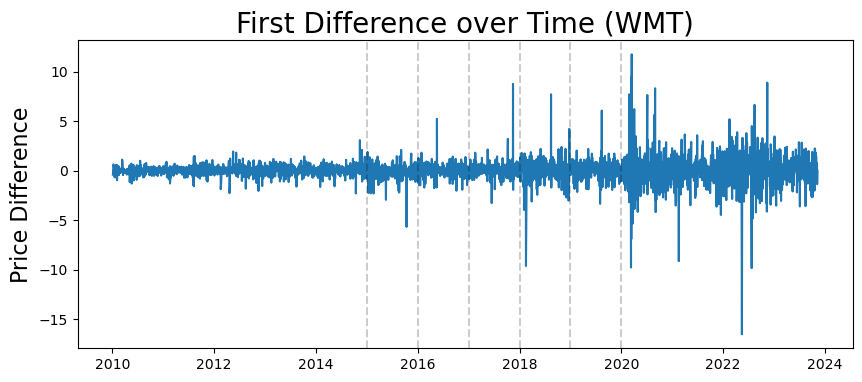

In [5]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.first_difference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

So, now this looks a lot more stationary compared to what we saw in the previous price graph. At least, it looks centred around zero, rather than growing over time. The volatility is still kind of up in the air, because there are periods of higher volatility than others. Also, it doesn't look like there is strong seasonal component, but of course these are all the things that can be more robustly tested. But we can be more comfortable to create ACF and PACF with this rather than the previous non-stationary series.

# Autocorrelation Function (ACF)

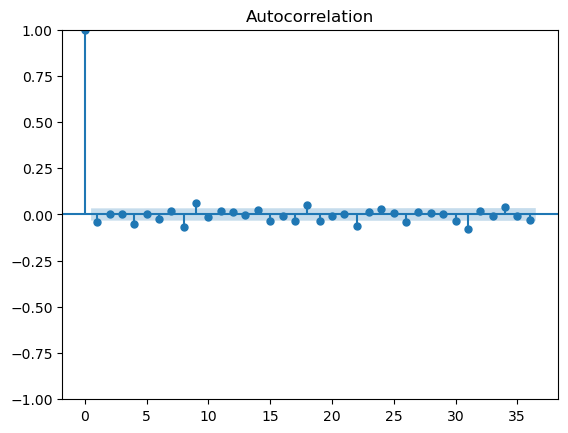

In [6]:
acf_plot = plot_acf(tickerDf.first_difference)

##### The ACF doesn't help us much here. Ofcourse the zero is when the flag is 100%, but nothing else really stands out all that much. So, no strong evidence here. Let's see how PACF goes.

## Partial Autocorrelation Function (PACF)

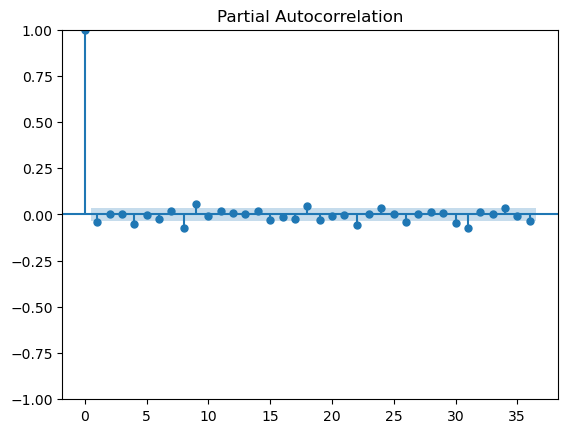

In [7]:
pacf_plot = plot_pacf(tickerDf.first_difference)

##### Looks pretty much the same, no strong evidence of correlation here either. At this point, we can clearly understand why stock price prediction is such a difficult job. Though we haven't done any complex analysis yet. But looking at the ACF and PACF we can certainly tell that we are kind of stuck as it looks like there's not any lags that's particularly standing out. There may be a few here and there, that's very high and going to help us for sure to predict the stock price time series.